### 0. 簡言

今天要介紹的是Top 10 algorithms in data mining之中的SVM，也就是「支持向量機」，Support Vector Machine。

SVM是一種知名的二元分類器(binary classifier)，由俄羅斯的統計學家Vapnik 等人所提出，一種基於統計學習理論的演算法。

簡單地說，SVM是一種監督式學習的演算法，試圖從資料中建構一個超平面(hyperplane)，將資料區分成兩個類別(2 classes)，最後進行預測/分類。

若沒有學過SVM的人，光看上面這句話一定一頭霧水。但我也不打算在此解釋SVM演算法的細節與延伸。有興趣的話，可以參考下面的連結自我學習：

- [林軒田-機器學習技法](https://www.youtube.com/user/hsuantien/videos)

- [逍遙工作室-支持向量機](https://cg2010studio.com/2012/05/20/%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%A9%9F%E5%99%A8-support-vector-machine/#more-5742)

- [逍遙工作室-非線性支持向量機(non-linear SVMs)](https://cg2010studio.com/2012/05/20/%E9%9D%9E%E7%B7%9A%E6%80%A7%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%A9%9F%E5%99%A8-non-linear-svms/#more-5761)

- [Support Vector Machine Simplified using R](https://www.listendata.com/2017/01/support-vector-machine-in-r-tutorial.html)

(強烈建議先將SVM的演算法弄熟，再繼續往下閱讀)

### 1. Support Vector Machine(SVM)

一直以來，SVM就是資料科學中最受歡迎的分類演算法之一。

無論是小數據的運用(和深度學習需要大數據Big Data在背後支援不同)；非線性可分(non-linear separability)的問題；高維模式識別問題上(醫學、圖像辨識…)，SVM都有不錯的表現。

其概念是建構一個超平面(hyperplane)，讓資料在空間中能夠被區分成兩類，所以又被稱為二元分類器(binary classifier)。

在二維的空間中，超平面指的就是「一條線」；三維空間中，則是「一個平面」；之所以有一個「超」字，是因為資料往往不會只有二維、三維。在更高維的空間中，我們無法觀察這個平面的形狀為何，於是就用「超平面(hyperplane)」一詞來概括。

(二維空間中的SVM超平面)

![image1](https://raw.githubusercontent.com/skydome20/R-Notes/master/src/R14/1.png)

(三維空間中的SVM超平面)

![image0](https://raw.githubusercontent.com/skydome20/R-Notes/master/src/R14/0.png)

這是一個分類問題，資料中記錄了六種玻璃材質內的化學元素含量，共有214個觀測值，10個變數：

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header=None)
df.columns = ["Id number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba" ,"Fe", "Type of glass"]

In [3]:
df.describe()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
X = df[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba" ,"Fe"]]
y = df["Type of glass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',decision_function_shape='ovo'))
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovo', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [6]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [7]:
confusion_matrix(y_train, train_pred)

array([[49, 10,  0,  0,  0,  0],
       [12, 50,  0,  0,  0,  0],
       [ 9,  5,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  0],
       [ 0,  1,  0,  0,  5,  0],
       [ 1,  0,  0,  0,  0, 20]], dtype=int64)

In [8]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           1       0.69      0.83      0.75        59
           2       0.76      0.81      0.78        62
           3       0.00      0.00      0.00        14
           5       1.00      1.00      1.00         9
           6       1.00      0.83      0.91         6
           7       1.00      0.95      0.98        21

    accuracy                           0.78       171
   macro avg       0.74      0.74      0.74       171
weighted avg       0.72      0.78      0.75       171



C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
confusion_matrix(y_test, test_pred)

array([[11,  0,  0,  0,  0,  0],
       [ 4, 10,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0],
       [ 0,  2,  0,  2,  0,  0],
       [ 0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  1,  7]], dtype=int64)

In [10]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.67      0.71      0.69        14
           3       0.00      0.00      0.00         3
           5       0.67      0.50      0.57         4
           6       0.50      0.33      0.40         3
           7       1.00      0.88      0.93         8

    accuracy                           0.72        43
   macro avg       0.59      0.57      0.57        43
weighted avg       0.68      0.72      0.69        43



在訓練及測試資料上都得到75%左右的準確率，效果還不錯，而且模型看起來並沒有發生overfitting的問題。

而且，這僅僅只是使用預設參數(default)所建立的SVM分類模型。

只要懂得進一步調整參數，便可以讓模型的表現更勝一層樓。(**相關討論會在第4節進行**)

### 2. SVM在多元分類(multi-class)的技巧

在第1節，我們很輕易地針對一個具有七種類別(7 classes)的資料，使用一個svm()的函式就建完模了。

不過…似乎有哪裡怪怪的？

如果你有這樣的疑問或感覺，表示你看到了某些關鍵點。

先回到一開始，不知道你還記不記得一件事：**SVM，是一種「二元分類器(binary classifier)」！**

換句話說，一個SVM的模型，只能處理一個具有兩種類別(2 classes)的資料。

然而，我們原本的資料卻有六種類別(6 classes)…話說到這理，你應該也看出問題在哪裡了吧：

「**一個二元分類器SVM，怎麼解決有六個類別的多元分類(multi-class)問題呢？**」

這個問題，便是這一小節要討論的！

在處理多元分類的問題時，最常用的是以下兩種解法/策略：

### (1) One-against-Rest(One-vs-All, OvA, OvR)：一對多


這個策略的想法是，就是針對每一個類別，分別建立一個SVM(或其他二元分類器)：屬於此類別的樣本視為(+1)，其他類別的樣本視為(-1)，如此一來，就轉換成一個二元分類的問題了！

以第1節的資料為例，資料中有六個類別(1~6，玻璃材質)，那我們便會建立六個SVM：

第一個SVM：屬於類別1的資料為(+1)，其他類別為(-1)，這個SVM用來區別這兩者

第二個SVM：屬於類別2的資料為(+1)，其他類別為(-1)，這個SVM用來區別這兩者

第三個SVM：屬於類別3的資料為(+1)，其他類別為(-1)，這個SVM用來區別這兩者

以此類推…

換句話說，針對有t個類別的資料，就會存在著t個SVM。

當有一筆新資料要預測時，會分別丟進這t個SVM，得到t組值(v1, v2, v3…vt)，再從中判別最大的值(如果類別是+1,-1)出現第幾個位置，那這筆資料便是屬於那一類。

這樣的做法很直覺，而且執行時間與記憶體並不會消耗太多。

但缺點是，將「剩下類別」視為同一個類別(-1)的這種做法，很容易導致(+1,-1)之間的資料筆數差距很大，也就是類別不平衡(class imbalance)的問題。



### (2) One-against-One(OvO)：一對一

這個策略的想法，很像高中數學的排列組合：從T種類別中任取2種類別，共會有幾種組合？

答案是：C(T,2) = T(T-1)/2

所以在這個策略底下，我們便會從多元類別(multi classes)的資料中，任選某兩個類別(2 classes)的資料，訓練一個SVM(只能區分這兩個類別)，並重複這樣的動作，直到所有的類別組合，都有其對應的SVM為止。

因此，最後會有 T(T-1)/2 個SVM模型。

當有一筆新資料要預測時，會分別丟進這 T(T-1)/2 個SVM，每一個SVM都會將這筆資料分到某一類，就像是投票一樣，該類別會記錄+1，最後判斷哪一個類別獲得最多票數，即可預測這筆資料屬於哪一個類別。

和One-against-Rest不同，這樣比較並不會造成類別不平衡的問題；

但相對的，這個策略所需的運行時間較長；也吃較多的記憶體；而且有時候會發生兩個以上的類別獲得同票數的狀況，造成判斷上的困擾。

另一個預測的思維是，用淘汰賽的方式：

![image0](https://raw.githubusercontent.com/skydome20/R-Notes/master/src/R14/2.png)

以上就是在面對多元分類問題時，最常用的兩種解法。

這兩種解法各有優劣，很難說哪一種方式比較好。在[這篇paper](https://hal.archives-ouvertes.fr/inria-00103955/document)中也提到，要使用哪一種方法，其實端看你的資料狀況而定。

### 3. Support Vector Regression(SVR)

SVR是本來SVM的延伸型態，能夠處理連續的預測問題。

差別只在於：

- 依變數的型態是factor時，svm()會建立SVM的超平面，來處理分類問題

- 依變數的型態是numeric，svm()會轉為SVR，進行連續值的預測。

這裡簡單手動建立一筆資料：

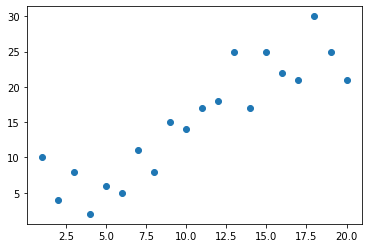

In [11]:
x = list(range(1,21,1))
y = [10,4,8,2,6,5,11,8,15,14,17,18,25,17,25,22,21,30,25,21]

plt.scatter(x,y)

我們可以先拉一條簡單的線性迴歸：

In [12]:
lr = LinearRegression().fit(pd.DataFrame(x),y)
y_pred = lr.predict(pd.DataFrame(x))

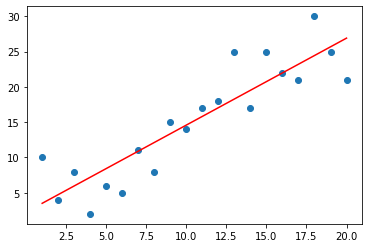

In [13]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")

我們可以直接用SVR來建模、預測：

In [14]:
reg = make_pipeline(StandardScaler(), SVR(kernel="sigmoid"))
reg.fit(pd.DataFrame(x),y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='scale', kernel='sigmoid', max_iter=-1,
                     shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [15]:
y_svr_pred = reg.predict(pd.DataFrame(x))

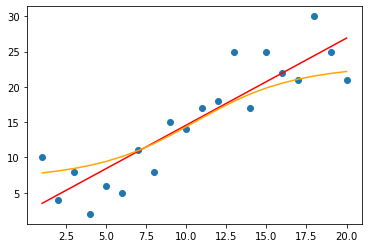

In [16]:
plt.scatter(x,y)
plt.plot(x,y_pred,color="red")
plt.plot(x,y_svr_pred,color="orange")

可以發現到，在這個例子，SVR比lm的更適合非線性的資料

### 4. 參數討論

對我來說，這一小節是最重要的部分！

前面在做SVM、SVR，我們都是用預設的參數來建模，並且都得到還不錯的效果，這是因為我們的資料並不複雜。

但是現實中，這種事情幾乎不可能發生。所以我們必須了解SVM裡面的參數，了解它們的意義，了解如何有效率地調整他們，讓模型既不會發生overfitting，同時表現合乎預期。

(在開始前，強烈建議先將SVM的演算法細節搞懂，否則這一小節會看不懂。)

那麼，我們就開始吧！

在SVM，有一些重要的參數值得關注，並會針對其中幾個進一步討論：

- kernal = 將資料映射到特徵空間的kernel-fun，用來處理「非線性可分」的問題。
- C = 在Lagrange formulation中的大C，決定給被誤差/分錯的資料「多少」懲罰值。
- epsilon = margin of tolerance。越大，表示在容忍範圍內的誤差/分錯的資料，不會被懲罰；反之，越接近0，每一個誤差/分錯的資料都會被懲罰。
- gamma   = 在kernel-fun裡面的參數(linear-fun除外)。

先來談談C，也就是cost吧！

### C(cost)

一開始的SVM，是要尋找一個能夠完美將「所有」資料分成兩邊，具有最大margin的超平面，這又被稱為“hard-margin SVM”。

但由於hard-margin SVM，追求要將資料完美分好，因此很容易有overfitting的風險。於是1995年，Vapnik等人提出了“soft-margin SVM”，讓SVM能容許一些被分錯的資料存在。

在soft-margin SVM的損失函數(loss function)中，這個大C的存在，就是容錯項。

藉由C，我們能給予那些被分錯的資料懲罰值，控制support vectors(用來決定超平面的那些資料點)的影響力。

- soft-margin SVM的 primal 型態： 

![image0](https://raw.githubusercontent.com/skydome20/R-Notes/master/src/R14/3.png)

- 轉為Lagrange Formulation：

![image0](https://raw.githubusercontent.com/skydome20/R-Notes/master/src/R14/4.png)

換句話說：

- C越大，代表容錯越小，越少support vectors，越接近hard-margin SVM的概念，卻容易overfitting

- C越小，代表容錯越大，越多support vectors，可以追求更大的margin

如下圖所示，圈圈的點代表support vectors，用來決定margin的大小。

當C=1000時，support vectors的點幾乎都發生在線上面，很接近hard-margin SVM的概念。

當C越來越小，隨著support vectors的點越來越多，表示margin的範圍越來越大。

![image0](https://raw.githubusercontent.com/skydome20/R-Notes/master/src/R14/5.png)

以第1節的例子來說，我們依序提高C的值(從1~1000)，然後觀察support vectors的數量變化：

In [17]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header=None)
df.columns = ["Id number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba" ,"Fe", "Type of glass"]
X = df[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba" ,"Fe"]]
y = df["Type of glass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
C = list(range(1,1000,5))
sv_list = []
for c in C:
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto',decision_function_shape='ovo',C=c))
    clf.fit(X_train, y_train)
    sv_list.append(clf['svc'].support_vectors_.shape[0])

Text(0.5, 0, 'C value')

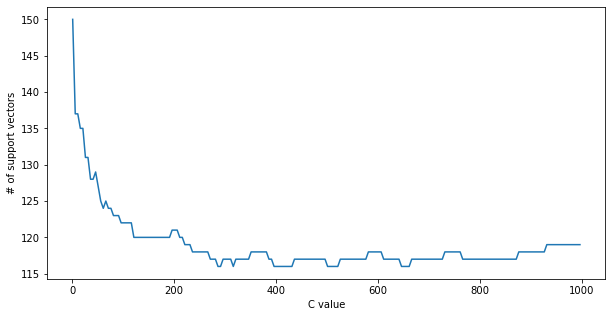

In [19]:
plt.figure(figsize=(10,5))
plt.plot(C,sv_list)
plt.ylabel("# of support vectors")
plt.xlabel("C value")

### Epsilon (ε)

這個參數主要影響的會是SVR，而非SVM。因為在SVR的損失函數中，使用的是epsilon intensive hinge loss。

Epsilon(ε)的概念是給予一個margin of tolerance，創造一個「絕對領域」的感覺。

在「絕對領域」內的資料點會被忽視，它們的殘差(error)一點幫助也沒有，換句話說：**它們對訓練SVR一點幫助也沒有**。

如下圖所示，Epsilon(ε)會創造一個width of zone，讓在這個容忍區塊裡面的資料被忽視。

![image0](https://raw.githubusercontent.com/skydome20/R-Notes/master/src/R14/6.png)

因此我們可以這樣說：

- Epsilon越大，代表容忍區塊越大，越多資料會被忽視，造成模型的準確度越低，support vectors的數量減少(記得，所謂的support vectors是那些across margin的資料點，它們的殘差會被納入考量，用來決定最後的margin)。

- Epsilon越低(→0+)，所有的資料殘差(error)都會被考慮，卻也容易造成overfitting。



這邊改以第3節的SVR案例來說明，當逐漸調高Epsilon(0~1)，觀察support vectors的數量：

In [20]:
x = list(range(1,21,1))
y = [10,4,8,2,6,5,11,8,15,14,17,18,25,17,25,22,21,30,25,21]

In [21]:
ep_list = np.arange(0,1,0.05)
sv_list = []
rmse_list = []
for e in ep_list:
    reg = make_pipeline(StandardScaler(), SVR(C=1, epsilon=e))
    reg.fit(pd.DataFrame(x),y)
    y_pred = reg.predict(pd.DataFrame(x))
    sv_list.append(reg["svr"].support_vectors_.shape[0])
    rmse_list.append(mean_squared_error(y, y_pred) ** 0.5)

Text(0.5, 0, 'ε value')

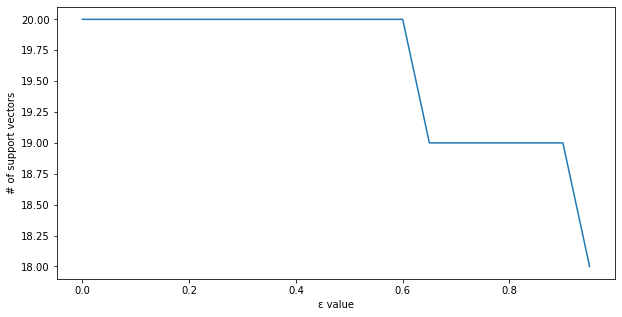

In [22]:
plt.figure(figsize=(10,5))
plt.plot(ep_list,sv_list)
plt.ylabel("# of support vectors")
plt.xlabel("ε value")

Text(0.5, 0, 'ε value')

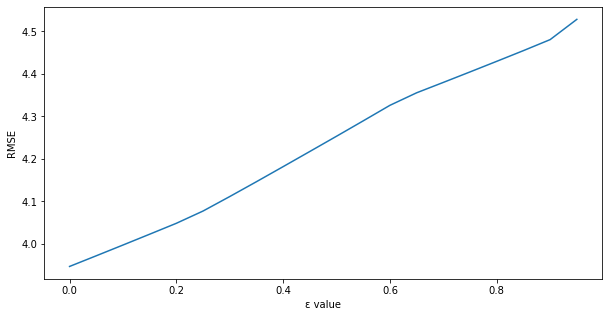

In [23]:
plt.figure(figsize=(10,5))
plt.plot(ep_list,rmse_list)
plt.ylabel("RMSE")
plt.xlabel("ε value")

Gamma
這是用在kernel function中的參數，主要是polynomial、radial basis(RBF)和sigmoid。

這邊有[不同kernel function的優劣討論](http://blog.fukuball.com/lin-xuan-tian-jiao-shou-ji-qi-xue-xi-ji-fa-machine-learning-techniques-di-3-jiang-xue-xi-bi-ji/)，可以事先讀一下。

Gamma的意義比較難以說明，當使用kernel function將原始資料映射到特徵空間(feature space)時，它隱含地決定了資料在特徵空間的分佈狀況。

以幾何的觀點來看，當gamma增加時，會讓Radial Basis Function(RBF)裡面的σ變小，而σ很小的高斯分佈會又高又瘦，讓只在附近的資料點有所作用。(參考)

在定義中，Gamma = How far the influence of a single training example reaches，意思是(參考)：

- gamma大，資料點的影響力範圍比較近，對超平面來說，近點的影響力權重較大，容易勾勒出擬合近點的超平面，也容易造成overfitting。

- gamma小，資料點的影響力範圍比較遠，對超平面來說，較遠的資料點也有影響力，因此能勾勒出平滑、近似直線的超平面。

這裡拿第1小節的SVM來說明，當陸續提高gamma的值時，所對應的訓練資料、測試資料的分類準確率度：

In [24]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header=None)
df.columns = ["Id number", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba" ,"Fe", "Type of glass"]
X = df[["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba" ,"Fe"]]
y = df["Type of glass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
gm_list = np.arange(0.1,10,0.5)
train_acc = []
test_acc = []
for g in gm_list:
    clf = make_pipeline(StandardScaler(), SVC(gamma=g,decision_function_shape='ovo'))
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_train,y_train_pred))
    test_acc.append(accuracy_score(y_test,y_test_pred))

Text(0.5, 0, 'Gamma Value')

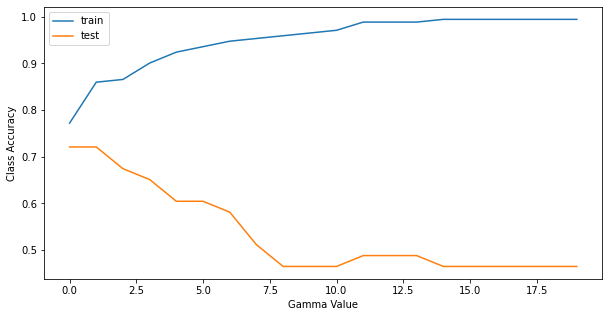

In [26]:
plt.figure(figsize=(10,5))
plt.plot(train_acc,label="train")
plt.plot(test_acc,label="test")
plt.legend()
plt.ylabel("Class Accuracy")
plt.xlabel("Gamma Value")

隨著gamma增加，訓練資料的準確度也提高，但測試資料的準確度卻降低，表示有overfitting的問題產生。

(更多SVM參數的討論可以參閱這篇：[SVM Parameters](https://svmlearning.com/parameters/))

### 補充：參數調整(Tune Parameters)

在調參數的階段，所使用的常見手法被稱為grid search，概念是針對每一種參數組合，都會訓練一個對應的模型，最後觀察模型的表現，挑出表現最佳的模型。

在訓練的過程中，引入cross validation的手法，確保模型的可靠度(Robustness)，讓tune出來的參數是可以採用的。

並且在調整這些參數時，可以發現不同的參數之間有著不同的交互關係

### 5. 總結

SVM是資料科學中最重要的演算法之一，它同時具有機器學習和統計理論的長處，在分類及預測的問題上都表現得不錯。

但要充分發揮SVM/SVR的長處，需要將其中的許多細節(參數)知道得十分清楚，同時具有對資料的敏銳度才行。

網路上有不少資源，首推林軒田的「機器學習技法」，裡面完整介紹了SVM的細節與延伸，當然有很多數學，但也因此相當紮實，值得花時間好好靜下來學習。

### Reference

[林軒田-機器學習技法](https://www.youtube.com/user/hsuantien/videos)

[逍遙工作室-支持向量機](https://cg2010studio.com/2012/05/20/%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%A9%9F%E5%99%A8-support-vector-machine/#more-5742)

[逍遙工作室-非線性支持向量機(non-linear SVMs)](https://cg2010studio.com/2012/05/20/%E9%9D%9E%E7%B7%9A%E6%80%A7%E6%94%AF%E6%8C%81%E5%90%91%E9%87%8F%E6%A9%9F%E5%99%A8-non-linear-svms/#more-5761)

[SVM Gamma Parameter](https://www.youtube.com/watch?v=m2a2K4lprQw&ab_channel=Udacity)

[林軒田教授機器學習技法 Machine Learning Techniques 第 3 講學習筆記](http://blog.fukuball.com/lin-xuan-tian-jiao-shou-ji-qi-xue-xi-ji-fa-machine-learning-techniques-di-3-jiang-xue-xi-bi-ji/)

[One Against One” or ”One Against All”: Which One is Better for Handwriting Recognition with SVMs?](https://hal.inria.fr/inria-00103955/document)
[SVM Parameters](https://svmlearning.com/parameters/)